인공지능 : 인간처럼 학습하고 판단하는 것에 관한 것  
머신러닝 : 명시적인 프로그래밍 없이 데이터로부터 패턴을 학습하고 예측하는 것   
딥러닝 : 인공 신경망을 사용한 알고리즘을 통해 학습 및 예측을 수행

---

머신러닝에서 종류(class) 중에서 하나를 구별해 내는 것을 분류(classification)라고 하고 2개의 class에서 하나를 선택하는 것은 이진 분류 (binary classification)이라함

특성(feature)은 데이터를 표현하는 하나의 성질



In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0]


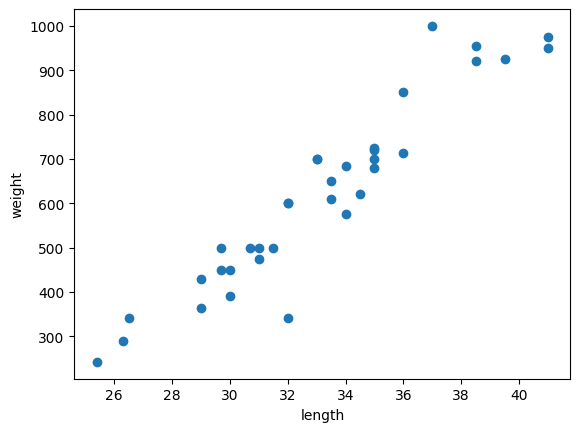

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



이렇게 산점도 그래프가 일직선에 가까울 때 선형(linear)적 이라고 함.

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
12.2, 19.7, 19.9]

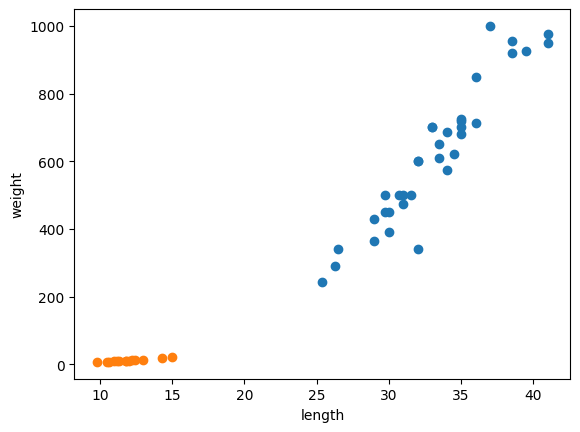

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14 # k-nn classification은 지도 학습이라고 봐야한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) # 모델에 데이터를 전달하고 규칙을 학습하는 과정을 "훈련"이라고 한다.

kn.score(fish_data, fish_target)

1.0

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) # k 설정하기

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

읽어보자.





머신러닝
- 지도 학습 (suprevised learning)
  - training data
    - 입력(input)
    - 타깃(target)
- 비지도 학습 (unsupervised learning)
  - training data
    - only input
- 강화 학습


train set과 test set을 준비해야함.  
과대적합, 과소적합을 판단하기 위해서.

또한 샘플링 편향(sampling bias)를 주의해야함.
샘플링 편향은 train set, test set 등 모든 데이터에 대한 개념임.


In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
input_arr.shape

(49, 2)

In [ ]:
np.random.seed(1)
idxs = np.arange(49)
np.random.shuffle(idxs)
idxs

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25,  6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [ ]:
train_input = input_arr[idxs[:35]]
train_target = target_arr[idxs[:35]] # array indexing

test_input = input_arr[idxs[35:]]
test_target = target_arr[idxs[35:]]

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# 02 - 2 데이터 전처리부터 읽으면 됨




In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0,
9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data,
    fish_target,
    random_state=1,
    stratify=fish_target,
)

# 25%를 테스트 케이스로 둠

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

kn.predict([[25, 150]])

array([0.])

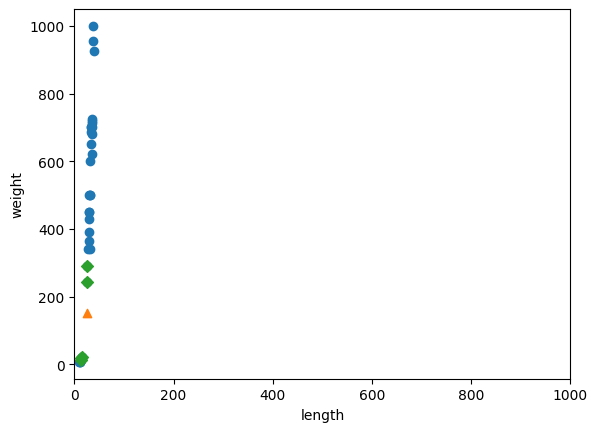

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정합니다
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.show()

> A peculiarity (sometimes even a disadvantage) of the k-NN algorithm is its sensitivity to the local structure of the data. In k-NN classification the function is only approximated locally and all computation is deferred until function evaluation.   
***Since this algorithm relies on distance, if the features represent different physical units or come in vastly different scales, then feature-wise normalizing of the training data can greatly improve its accuracy***

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm 에서 발췌

데이터 전처리(data preprocessing)을 해보자

#### 표준점수 (standard score or z score)

각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄. 특성값들을 동일한 조건으로 비교 가능



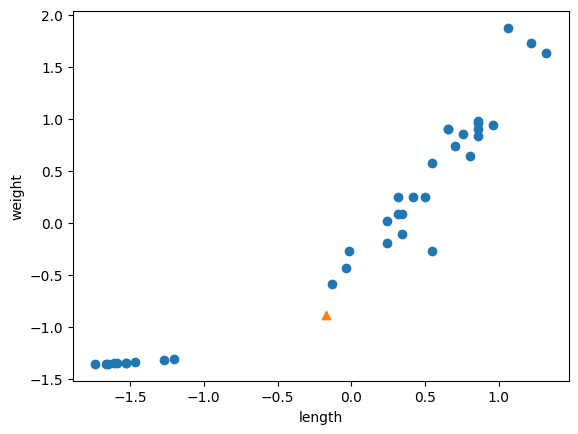

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std # numpy 브로드캐스팅(broadcasting)

plt.scatter(train_scaled[:,0], train_scaled[:,1])

new = ([25, 150] - mean) / std

plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

# 03-1 Regression


- 지도 학습 (supervised learning)
  - 분류 (classification)  
  클래스 중 하나로 분류하는 것
  - 회귀 (regression)  
  임의의 어떤 숫자를 예측하는 것
  > 어떤 변수(종속 변수)가 다른 변수(독립 변수)에 어떻게 영향을 받는지를 분석하는 기법

- k-NN
  - k-NN classification
  - k-NN regression



In [ ]:
import numpy as np

perch_length = np.array(
[ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)
perch_weight = np.array(
[ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
1000.0, 1000.0]
)

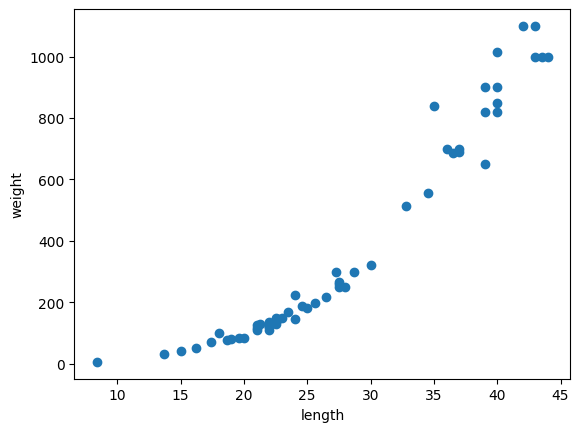

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target)


분류의 경우 정확도

회귀의 경우에는 $ R^2 $ or 결정계수를 통해 모델을 평가함.





In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

- 과대 적합
  훈련셋에 대해서는 점수가 좋지만 테스트셋에 대해서는 점수가 굉장히 나쁘면 그걸 과대적합 (overfitting)이라함.

  전체 = 나머지 + 훈련셋 + 테스트셋인데
  훈련셋에 대해서만 너무 적합하여 전체 데이터에 대해서는 예측을 잘 못함.

- 과소 적합
  훈련 세트에 비해 테스트 세트가 점수가 너무 높거나 두 점수 모두 너무 낮은 경우에 과소적합 (underfitting) 되었다고 함.

=> 데이터나 모델을 수정해야함

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


- model parameter
  - coef_ or weight
  - interfcept_

- 모델 기반 학습
- 사례 기반 학습




선형 회귀(Linear Regression)
- 단일 선형 회귀 (Simple Linear Regression)
  하나의 독립 변수를 사용하여 종속 변수를 예측

- 다중 선형 회귀 (Multiple Linear Regression)
  두 개 이상의 독립 변수를 사용하여 종속 변수를 예측
  변수 여러 개

  다항 회귀(Polynomial Regression)는 다중 선형 회귀임. 왜냐면 x^2, x^1 모두 치환 가능하기 때문임.  

  > Thus, polynomial regression is a special case of linear regression.  
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

선형 회귀를 단수한 모델이라 생각하면 안됨, 고차원 선형 회귀 모델의 경우 매우 복잡한 모델을 표현 할 수도 있음.




  
  


특성 공학 (feature engineering)   
기존의 특성을 사용해 새로운 특성을 뽑아내는 것 => week02에서 계속...



In [ ]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()


array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [ ]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.

SyntaxError: invalid syntax (<ipython-input-4-df2617fbba97>, line 6)